## Logistic Regression in Python

### By Thomas Oswald

#### DATA 4319, Spring 2020

Logistic regression is a statisical model that in its basic form, uses a logistic function, such as sigmoid, to model a binary dependent variable.  In this notebook, I will use data from 2 different species within the iris dataset and plot a regression model between 2 species and their measurements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Above is a plot of the data, clearly we have two clusters of measurements for the two species that this notebook is covering.  One cluster is for the virginica species and the other is the Setosa.

In [2]:
data = pd.read_csv('iris_data.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Read in the Iris Dataset csv
data = pd.read_csv('iris_data.csv')
data = data.drop(['SepalWidth', 'PetalWidth'], axis = 1)
data.insert(2,"Bias", np.ones(150))

# Create a subset dataframe from which testing is derived from
data1 = data.iloc[:,0:4].values
data2 = data.iloc[:,0:4].values
data3 = data.iloc[:,0:4].values

for i in range(150):
    if data1[i][3] == "setosa":
        data1[i][3] = 1
    else:
        data1[i][3] = 0
        
for i in range(150):
    if data2[i][3] == "versicolor":
        data2[i][3] = 1
    else:
        data2[i][3] = 0

for i in range(150):
    if data3[i][3] == "virginica":
        data3[i][3] = 1
    else:
        data3[i][3] = 0

### Plot Iris measurements and observe clusters of data

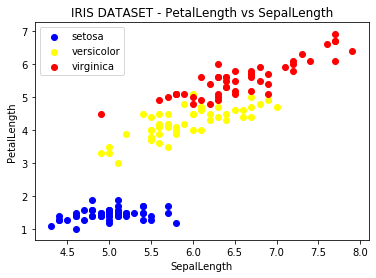

In [4]:
plt.scatter(data1[0:50,0],
            data1[0:50,1],
            color = 'b',
            label = "setosa")

plt.scatter(data1[50:100,0],
            data1[50:100,1],
            color = 'yellow',
            label = "versicolor")

plt.scatter(data1[100:150,0],
            data1[100:150,1],
            color = 'r',
            label = "virginica")

plt.title("IRIS DATASET - PetalLength vs SepalLength")
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

Above is a plot of the data, clearly we have three clusters of measurements for the three species that this notebook is covering.

In [5]:
W = np.random.randn(3)                        # Initial Weights
#W = [0.90897637, -0.43371824,  0.78531065]
W

array([ 2.00112832, -0.27264861, -0.01620229])

### Define Essential Functions

In [87]:
# z = W'X
def z(x,W):                                    # z(x1[:,0:3][i],W)  For the ith entry in the array
    return np.dot(np.transpose(W), x)          # 1x3 dot 3x1 = 1x1

# Sigmoid Function
def sig(x,W):                                  # sig(x1[:,0:3][i],W) For the ith entry in the array
    return ( 1 / (1+np.exp(-z(x,W))) )         # Returns 1x1

#Loss Function
def loss(x, W):
    loss_sum = 0
    for i in range(len(x)):                          
        loss_sum += (x[i][3]*np.log(sig(x[i][0:3],W)) + (1.0 - x[i][3]) * np.log(1.0 - sig(x[i][0:3],W)))
    
    return (-1.0/len(x))* loss_sum                         # returns 1x1

# d_Loss Function
def d_loss(x,W):
    W1 = W[0]
    W2 = W[1]
    W3 = W[2]
    for i in range(len(x)):
        W1 += (sig(x[i][0:3],W) - x[i][3])*x[i][0]
        W2 += (sig(x[i][0:3],W) - x[i][3])*x[i][1]
        W3 += (sig(x[i][0:3],W) - x[i][3])*x[i][2]
        
    W1 = W1 * (1.0/len(x))
    W2 = W2 * (1.0/len(x))
    W3 = W3 * (1.0/len(x))
    return [W1, W2, W3]

# Gradient Descent
def gradient_descent(x, alpha, epsilon):
    i = 1.0
    W = np.random.randn(3)
    loss_history = []
    error_points = [(i, loss(x, W))]
    while loss(x, W) > epsilon and i < 100.0:             # for 100 iterations
        W -= np.dot(alpha,d_loss(x, W))
        i += 1.0
        loss_history.append(loss(x,W))
        error_points.append((i, loss(x, W)))
    
    return W, error_points, loss_history

# Predict function
def predict(x,W):
    if sig(x[0:3],W) > 0.5:
        return 1
    else:
        return 0

## Perform Gradient descent on each iris set

In [88]:
W1 = gradient_descent(data1, 1.0, 0.00001)[0]
P1 = gradient_descent(data1, 1.0, 0.00001)[1]
L1 = gradient_descent(data1, 1.0, 0.00001)[2]

W2 = gradient_descent(data2, 1.0, 0.00001)[0]
P2 = gradient_descent(data2, 1.0, 0.00001)[1]
L2 = gradient_descent(data2, 1.0, 0.00001)[2]

W3 = gradient_descent(data3, 1.0, 0.00001)[0]
P3 = gradient_descent(data3, 1.0, 0.00001)[1]
L3 = gradient_descent(data3, 1.0, 0.00001)[2]

## Plot seperators for each cluster

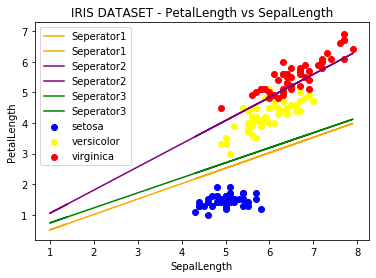

In [92]:
y_new = -(W1[0]/W1[1])*data1[:,0:2] - (W1[2]/W1[1])
y_new2 = -(W2[0]/W2[1])*data2[:,0:2] - (W2[2]/W2[1])
y_new3 = -(W3[0]/W3[1])*data3[:,0:2] - (W3[2]/W3[1])


plt.scatter(data1[0:50,0],
            data1[0:50,1],
            color = 'b',
            label = "setosa")

plt.scatter(data1[50:100,0],
            data1[50:100,1],
            color = 'yellow',
            label = "versicolor")

plt.scatter(data1[100:150,0],
            data1[100:150,1],
            color = 'r',
            label = "virginica")


plt.plot(data1[:,0:2],
         y_new,
         color = 'orange',
         label = 'Seperator1')

plt.plot(data1[:,0:2],
         y_new2,
         color = 'purple',
         label = 'Seperator2')


plt.plot(data1[:,0:2],
         y_new3,
         color = 'green',
         label = 'Seperator3')

plt.title("IRIS DATASET - PetalLength vs SepalLength")
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

## Plot the History of the loss function

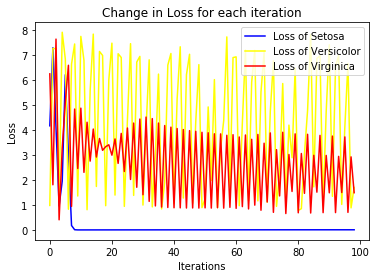

In [96]:
plt.plot(L1,
         color = "b",
         label = "Loss of Setosa")

plt.plot(L2,
         color = "yellow",
         label = "Loss of Versicolor")

plt.plot(L3,
         color = "red",
         label = "Loss of Virginica")


plt.title("Change in Loss for each iteration")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()